## Busca em grafos

Partindo da implementação da última aula, onde conseguimos criar a nossa matriz de adjacência, iremos agora criar dois novos métodos para realizarmos buscas em grafos. Essas buscas podem ter diferentes aplicações, como:

- Encontrar todos os nós que consigo chegar a partir de um;
- Saber se existe um caminho entre dois nós;
- Procurar loops.

Focaremos nos métodos:

- Busca em proufundidade
- Busca em largura

### Classe Grafo

Para seguirmos o exemplo visto nos slides, utilizaremos um grafo não direcionado. Contudo, o método que escreveremos é válido para ambos os tipos de grafos.

In [1]:
class Grafo():
    def __init__(self):
        # Iniciamos a nossa matriz de adjacencia, que nem vimos la em cima
        self.adjacencia = {}
    
    def adiciona(self, vertice):
        # Para adicionar um vertice, simplesmente criamos a chave dele dentro nosso dicionario de adjacencia
        self.adjacencia[vertice] = {}
    
    def conecta(self, origem, destino, peso = 1):
        # Acessamos nosso vertice e criamos uma chave para a conexao dele, atribuindo o valor como sendo o peso
        self.adjacencia[origem][destino] = peso
        self.adjacencia[destino][origem] = peso
    

### Criando o grafo dos slides

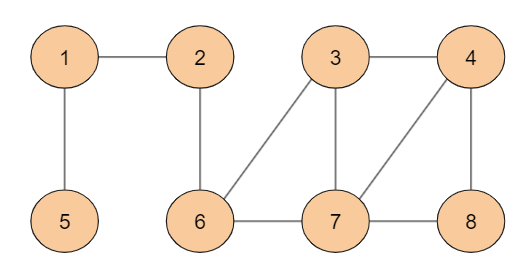

In [7]:
def cria_grafo():
    g = Grafo()
    g.adiciona(1)
    g.adiciona(2)
    g.adiciona(3)
    g.adiciona(4)
    g.adiciona(5)
    g.adiciona(6)
    g.adiciona(7)
    g.adiciona(8)
    g.conecta(1, 2)
    g.conecta(1, 5)
    g.conecta(2, 6)
    g.conecta(6, 3)
    g.conecta(6, 7)
    g.conecta(3, 7)
    g.conecta(3, 4)
    g.conecta(7, 4)
    g.conecta(7, 8)
    g.conecta(4, 8)
    return g

In [8]:
g = cria_grafo()
g.adjacencia

{1: {2: 1, 5: 1},
 2: {1: 1, 6: 1},
 3: {6: 1, 7: 1, 4: 1},
 4: {3: 1, 7: 1, 8: 1},
 5: {1: 1},
 6: {2: 1, 3: 1, 7: 1},
 7: {6: 1, 3: 1, 4: 1, 8: 1},
 8: {7: 1, 4: 1}}

## Busca em profundidade

In [36]:
class Grafo():
    def __init__(self):
        # Iniciamos a nossa matriz de adjacencia, que nem vimos la em cima
        self.adjacencia = {}
    
    def adiciona(self, vertice):
        # Para adicionar um vertice, simplesmente criamos a chave dele dentro nosso dicionario de adjacencia
        self.adjacencia[vertice] = {}
    
    def conecta(self, origem, destino, peso = 1):
        # Acessamos nosso vertice e criamos uma chave para a conexao dele, atribuindo o valor como sendo o peso
        self.adjacencia[origem][destino] = peso
        self.adjacencia[destino][origem] = peso
    
    def busca_profundidade(self, origem, visitados=None):
        # Criando lista de visitados vazia na primeira iteracao
        if visitados is None:
            visitados = []

        # Pegando os nós adjacentes, que são as chaves do meu dicionario interno
        visitados.append(origem)
        for adjacente in self.adjacencia[origem].keys():
            if adjacente not in visitados:
                self.busca_profundidade(adjacente, visitados)
        return visitados

In [37]:
g = cria_grafo()
g.busca_profundidade(2)

[2, 1, 5, 6, 3, 7, 4, 8]

## Busca em largura

In [44]:
class Grafo():
    def __init__(self):
        # Iniciamos a nossa matriz de adjacencia, que nem vimos la em cima
        self.adjacencia = {}
    
    def adiciona(self, vertice):
        # Para adicionar um vertice, simplesmente criamos a chave dele dentro nosso dicionario de adjacencia
        self.adjacencia[vertice] = {}
    
    def conecta(self, origem, destino, peso = 1):
        # Acessamos nosso vertice e criamos uma chave para a conexao dele, atribuindo o valor como sendo o peso
        self.adjacencia[origem][destino] = peso
        self.adjacencia[destino][origem] = peso
    
    def busca_profundidade(self, origem, visitados=None):
        # Criando lista de visitados vazia na primeira iteracao
        if visitados is None:
            visitados = []

        # Pegando os nós adjacentes, que são as chaves do meu dicionario interno
        visitados.append(origem)
        for adjacente in self.adjacencia[origem].keys():
            if adjacente not in visitados:
                self.busca_profundidade(adjacente, visitados)
        return visitados

    def busca_largura(self, origem):
        fila = [origem]
        visitados = []
        
        # enquanto tiver elementos na minha fila
        while len(fila) > 0:
            primeiro_elemento = fila[0]
            fila = fila[1:]
            visitados.append(primeiro_elemento)
            for adjacente in self.adjacencia[primeiro_elemento].keys():
                if adjacente not in fila and adjacente not in visitados:
                    fila.append(adjacente)
        return visitados

In [45]:
g = cria_grafo()
g.busca_largura(2)

[2, 1, 6, 5, 3, 7, 4, 8]

## E se eu quiser saber se existe um caminho entre um ponto e outro?

Podemos colocar uma verificação no meio dos nossos código e finalizar caso a gente encontre o ponto de destino :)

In [78]:
class Grafo():
    def __init__(self):
        # Iniciamos a nossa matriz de adjacencia, que nem vimos la em cima
        self.adjacencia = {}
    
    def adiciona(self, vertice):
        # Para adicionar um vertice, simplesmente criamos a chave dele dentro nosso dicionario de adjacencia
        self.adjacencia[vertice] = {}
    
    def conecta(self, origem, destino, peso = 1):
        # Acessamos nosso vertice e criamos uma chave para a conexao dele, atribuindo o valor como sendo o peso
        self.adjacencia[origem][destino] = peso
        self.adjacencia[destino][origem] = peso
    
    def busca_profundidade(self, origem, visitados=None):
        # Criando lista de visitados vazia na primeira iteracao
        if visitados is None:
            visitados = []

        # Pegando os nós adjacentes, que são as chaves do meu dicionario interno
        visitados.append(origem)
        for adjacente in self.adjacencia[origem].keys():
            if adjacente not in visitados:
                self.busca_profundidade(adjacente, visitados)
        return visitados
    
    def busca_profundidade_verifica_caminho(self, origem, destino, visitados=None):
        # Criando lista de visitados vazia na primeira iteracao
        if visitados is None:
            visitados = []
            
        if origem == destino:
            return True
        
        # Pegando os nós adjacentes, que são as chaves do meu dicionario interno
        visitados.append(origem)
        for adjacente in self.adjacencia[origem].keys():
            if adjacente not in visitados:
                if self.busca_profundidade_verifica_caminho(adjacente, destino, visitados):
                    return True
                
        return False

    def busca_largura(self, origem):
        fila = [origem]
        visitados = []
        while len(fila) > 0:
            primeiro_elemento = fila[0]
            fila = fila[1:]
            visitados.append(primeiro_elemento)
            for adjacente in self.adjacencia[primeiro_elemento].keys():
                if adjacente not in fila and adjacente not in visitados:
                    fila.append(adjacente)
        return visitados
    
    def busca_largura_verifica_caminho(self, origem, destino):
        fila = [origem]
        visitados = []
        
        # enquanto tiver elementos na minha fila
        while len(fila) > 0:
            primeiro_elemento = fila[0]
            fila = fila[1:]
            visitados.append(primeiro_elemento)
            for adjacente in self.adjacencia[primeiro_elemento].keys():
                if adjacente == destino:
                    return True
                if adjacente not in fila and adjacente not in visitados:
                    fila.append(adjacente)
        return False

In [66]:
g = cria_grafo()
g.busca_profundidade_verifica_caminho(2, 4)

True

In [77]:
g.busca_largura_verifica_caminho(2, 3)

True